In [1]:
import datetime as dt
from src.strategy_testing.optimizer_refactored import get_mt5_data, connect_to_mt5, prepare_data_for_backtest_optimization
import MetaTrader5 as mt5
import pytz
import pandas as pd
import mplfinance as mpf
import time
import numpy as np
import talib
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

C:\Users\Nichita\auto-trader\.venv\Lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

In [2]:
login=1510009878
password="825$tnr$DJ"
server="FTMO-Demo"

In [3]:
mt5.initialize()

True

In [19]:
df = get_mt5_data(mt5.TIMEFRAME_M15, "AUDJPY", start_pos=1, bar_count=5000)

In [20]:
prepare_data_for_backtest_optimization(df)

,High,Low,Close,Open,true_range,atr,next_support,next_resistance,lower_tail_proportion,upper_tail_proportion,...,next_low,bullish_gap,bearish_gap,swing_high,swing_low,change_of_character,break_of_structure,fvg,bullish_fvg_upper_bound,bullish_fvg_lower_bound
time,,,,,,,,,,,,,,,,,,,,,
2024-07-19 20:00:00,105.275,105.206,105.244,105.270,NaN,NaN,104.303342,105.250439,1.461538,0.192308,...,105.183,NaN,NaN,105.384,105.172,0,0,0,105.206,NaN
2024-07-19 20:15:00,105.254,105.183,105.233,105.245,0.071,NaN,104.303342,105.250439,4.166667,0.750000,...,105.213,NaN,NaN,105.384,105.172,0,0,0,105.183,NaN
2024-07-19 20:30:00,105.267,105.213,105.228,105.232,0.054,NaN,104.303342,105.250439,3.750000,8.750000,...,105.229,-0.062,-0.061,105.384,105.172,0,0,0,105.213,105.275
2024-07-19 20:45:00,105.277,105.229,105.276,105.229,0.049,NaN,105.250439,105.404000,0.000000,0.021277,...,105.256,-0.025,-0.094,105.384,105.172,0,0,0,105.229,105.254
2024-07-19 21:00:00,105.291,105.256,105.265,105.276,0.035,NaN,105.250439,105.404000,0.818182,1.363636,...,105.234,-0.011,-0.078,105.384,105.172,0,0,0,105.256,105.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-01 20:45:00,99.030,98.809,99.010,98.828,0.221,0.256214,98.624376,99.288027,0.104396,0.109890,...,99.007,0.348,-0.685,99.571,98.345,0,0,1,98.809,98.461
2024-10-01 21:00:00,99.122,99.007,99.102,99.007,0.115,0.225000,98.624376,99.288027,0.000000,0.210526,...,99.067,0.178,-0.701,99.571,98.345,0,0,1,99.007,98.829
2024-10-01 21:15:00,99.191,99.067,99.156,99.102,0.124,0.222571,98.624376,99.288027,0.648148,0.648148,...,99.039,0.037,-0.382,99.571,98.345,0,0,1,99.067,99.030


In [23]:
trades = pd.read_csv("src/strategy_testing/fvg_audjpy.csv", index_col=0)

In [24]:
trades.tail(25)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
11,350,1616,1660,96.943586,97.667854,253.493923,0.007471,2024-08-13 16:00:00,2024-08-14 03:00:00,NaN,0 days 11:00:00
12,350,1753,1759,97.200204,97.027289,-60.519988,-0.001779,2024-08-15 02:15:00,2024-08-15 03:45:00,NaN,0 days 01:30:00
13,350,1920,1962,98.420889,98.075311,-120.952393,-0.003511,2024-08-16 20:00:00,2024-08-19 06:30:00,NaN,2 days 10:30:00
14,350,1991,2041,97.892052,98.882898,346.796188,0.010122,2024-08-19 13:45:00,2024-08-20 02:15:00,NaN,0 days 12:30:00
15,350,2119,2129,98.071064,97.846607,-78.560073,-0.002289,2024-08-20 21:45:00,2024-08-21 00:15:00,NaN,0 days 02:30:00
16,350,2141,2196,98.019861,98.688386,233.983682,0.006820,2024-08-21 03:15:00,2024-08-21 17:00:00,NaN,0 days 13:45:00
17,350,2333,2337,98.013460,97.865700,-51.716162,-0.001508,2024-08-23 03:15:00,2024-08-23 04:15:00,NaN,0 days 01:00:00
18,350,2348,2389,97.832248,98.569607,258.075653,0.007537,2024-08-23 07:00:00,2024-08-23 17:15:00,NaN,0 days 10:15:00
19,350,2422,2424,97.909453,97.617825,-102.069864,-0.002979,2024-08-26 01:30:00,2024-08-26 02:00:00,NaN,0 days 00:30:00
20,350,2624,2736,97.822447,98.468798,226.222643,0.006607,2024-08-28 04:00:00,2024-08-29 08:00:00,NaN,1 days 04:00:00


In [41]:
df.loc["2024-08-19 10:45:00":"2024-08-19 14:00", ["Open", "High", "Low", "Close", "fvg"]].tail(10)

,Open,High,Low,Close,fvg
time,,,,,
2024-08-19 11:45:00,97.712,97.723,97.573,97.698,0
2024-08-19 12:00:00,97.703,97.742,97.622,97.735,0
2024-08-19 12:15:00,97.734,97.737,97.610,97.629,0
2024-08-19 12:30:00,97.630,97.711,97.593,97.702,0
2024-08-19 12:45:00,97.700,97.806,97.675,97.800,0
2024-08-19 13:00:00,97.801,97.927,97.795,97.920,1
2024-08-19 13:15:00,97.921,97.969,97.905,97.950,1
2024-08-19 13:30:00,97.951,98.021,97.898,97.910,0
2024-08-19 13:45:00,97.911,97.927,97.840,97.903,0


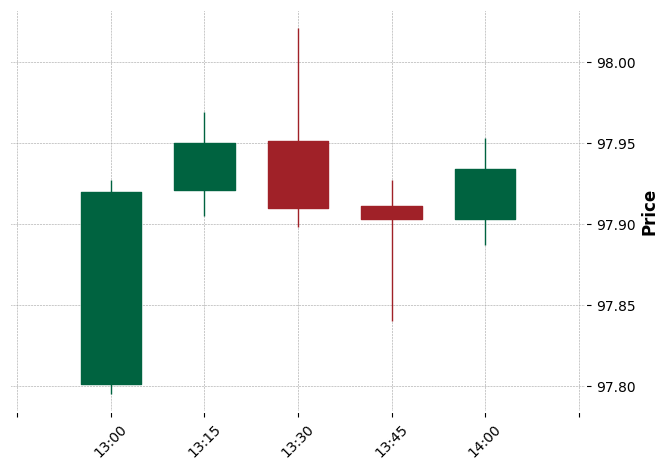

In [40]:
mpf.plot(df["2024-08-19 13:00:00":"2024-08-19 14:00:00"], style="charles", type="candle", volume=False)